## Project :Titanic- ML from disaster

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* khác giữa train và test là : train có cột Survived , test k có . mk sẽ xây dựng model để dự đoán xem hành khách trong file test có sống không

Notes:
* SibSp: # of siblings / spouses aboard the Titanic
* Parch: # of parents / children aboard the Titanic

* Ticket: Ticket number

* Cabin: Cabin number

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Pclass là hạng vé, 1 cao cấp, 2 bình thường, 3 thấp
* PassengerId :
The first column is the passenger ID. The ID for a passenger is just a number to identify this passenger in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset. Let's make it the index for the dataset just to demonstrate the use of df.set_index method.

In [6]:
train_df.set_index(train_df["PassengerId"], inplace = True)

In [7]:
## cột index với cột PassengerId gần như nhau , dạng là số thứ tự, nên ta cần thay nó
train_df.drop('PassengerId', axis = 1, inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df= pd.read_csv("test.csv", index_col = "PassengerId")
test_df.tail()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


# Phân loại biến 
* categorical, numeric

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


* Categorical: Survived, Sex, Embarked, Pclass (ordinal), SibSp , Parch
* Numerical: (continuous) Age, Fare, (discrete)

* Mix types of data: Ticket, Cabin

* Contain Error/Typo: Name
* Blank or Null: Cabin > Age > Embarked
* Various Data Type: String, Int, Float

In [11]:
train_df["Survived"] = train_df["Survived"].astype("category")

In [12]:
train_df["Survived"].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [13]:
features = ['Sex', 'Embarked', 'Pclass', 'SibSp' , 'Parch']
def convert_cat(df, feature):
    for feature in features:
        df[feature] = df[feature].astype("category")
convert_cat(train_df, features)
convert_cat(test_df, features)

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB


In [15]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


##  Distribution of Categorical features

In [16]:
train_df.describe(include = ["category"])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


In [17]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploratory Data Analysis (EDA)
* Correlating categorical fratures
    * Categorical :Survived, sex, Embraked, Pclass
* Target Variable: Survived

In [18]:
train_df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
train_df["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

38 % survived

### Sex

In [20]:
train_df["Sex"].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

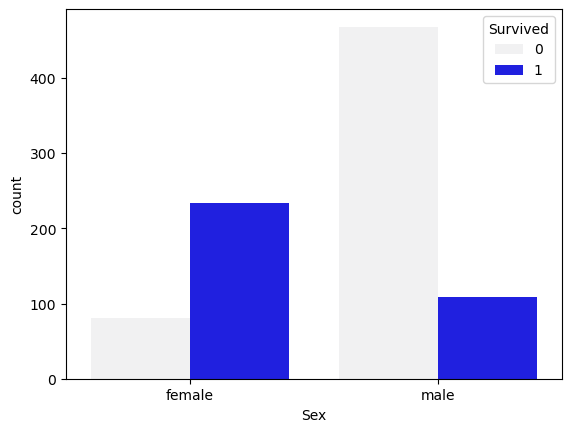

In [21]:
sns.countplot(data=train_df,x="Sex",hue="Survived", color = 'Blue')

- Remaining Categoracal Feature Columns

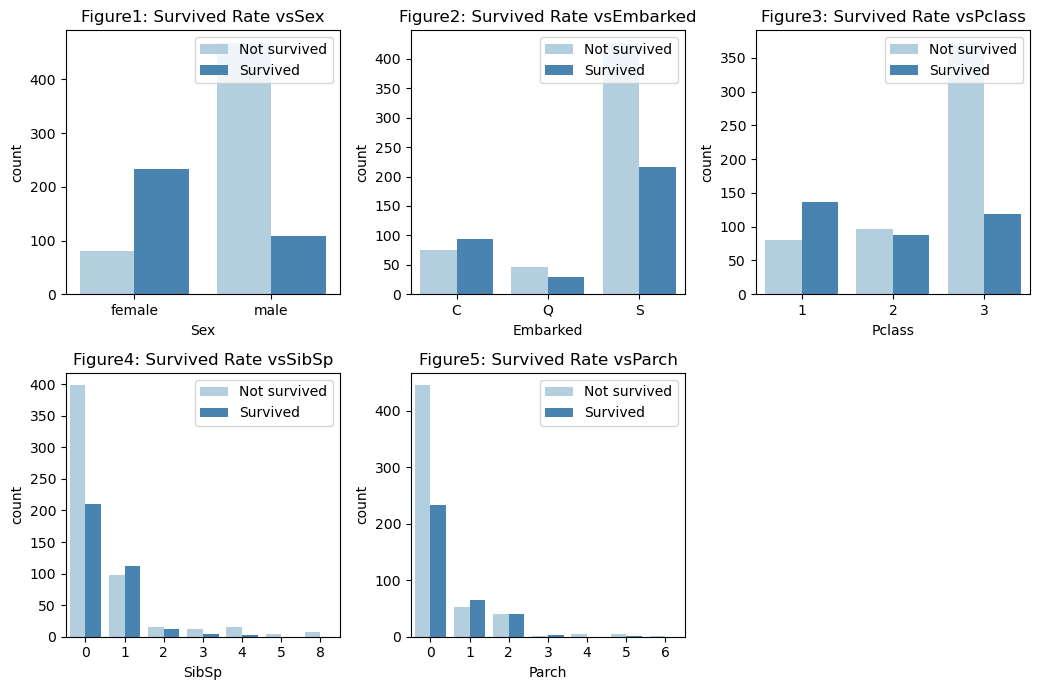

In [22]:
cols = ["Sex", "Embarked","Pclass","SibSp","Parch"]
n_rows = 2
n_cols = 3
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5, n_rows*3.5))
for r in range(0,n_rows):
    for c in range(0, n_cols):
        i = r*n_cols+c
        if i<len(cols):
            ax_i = ax[r,c]
            sns.countplot(data=train_df,x=cols[i],hue="Survived",palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure{i+1}: Survived Rate vs{cols[i]}")
            ax_i.legend(title ="",loc="upper right", labels=["Not survived", "Survived"])
ax.flat[-1].set_visible(False)
plt.tight_layout()
plt.show()

### EDA for numeric feature

Age

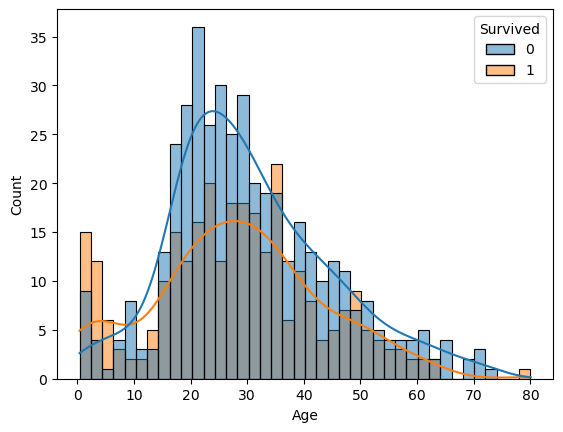

In [23]:
sns.histplot(data=train_df,x="Age", hue="Survived", bins= 40, kde=True)
plt.show()

Fare

In [24]:
train_df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15844\3745468247.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train_df,x="Fare",bins=40,palette="Blues")


<Axes: xlabel='Fare', ylabel='Count'>

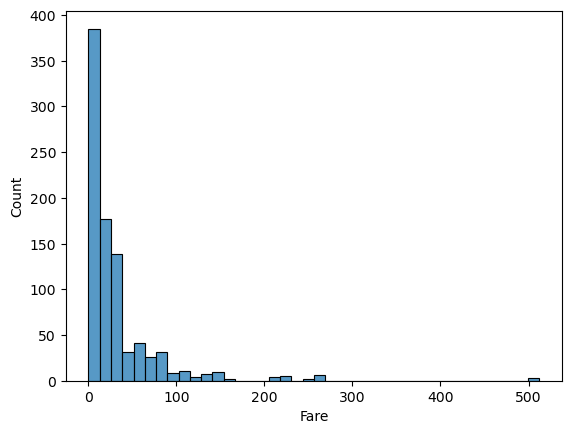

In [25]:
sns.histplot(data=train_df,x="Fare",bins=40,palette="Blues")

### 4. Feature Engineering & Data Wrangling

In [26]:
train_df["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [27]:
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    res = p.search(name).groups(1)[0].strip()
    return res

train_df["Title"] = train_df["Name"].apply(lambda name: extract_title(name))

In [28]:
train_df["Title"].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [29]:
test_df["Title"] = test_df["Name"].apply(lambda name: extract_title(name))

In [30]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [31]:
def group_title(title):
    if title in ["Mr", "Mrs", "Miss", 'Master']:
        return title
    elif title == "Ms":
        return "Miss"
    else:
        return "Other"

train_df["Title"] = train_df["Title"].apply(lambda title: group_title(title))

In [32]:
test_df["Title"] = test_df["Title"].apply(lambda title: group_title(title))

<Axes: xlabel='Title', ylabel='count'>

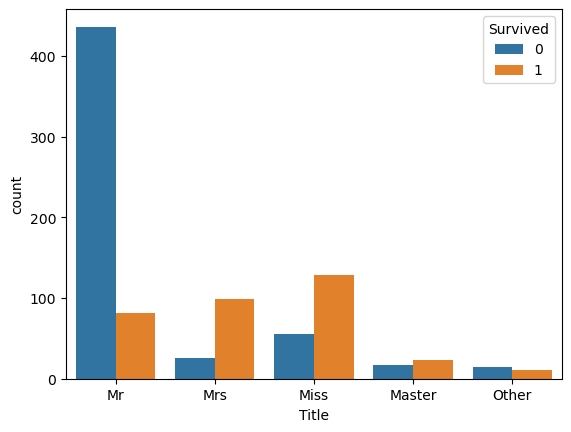

In [33]:
sns.countplot(data= train_df, x = "Title", hue = "Survived")

# Family
- SibSp, Parch

In [34]:
train_df["Family_size"] = train_df["SibSp"].astype("int") + train_df["Parch"].astype("int") +1
test_df["Family_size"] = test_df["SibSp"].astype("int") + test_df["Parch"].astype("int") +1

In [35]:
train_df["Family_cat"] = pd.cut(train_df["Family_size"], bins = [0, 1, 4, 6, 20], labels = ["Solo", "Small", "Medium", "Large"])

In [36]:
test_df["Family_cat"] = pd.cut(test_df["Family_size"], bins = [0, 1, 4, 6, 20], labels = ["Solo", "Small", "Medium", "Large"])

<Axes: xlabel='Family_cat', ylabel='count'>

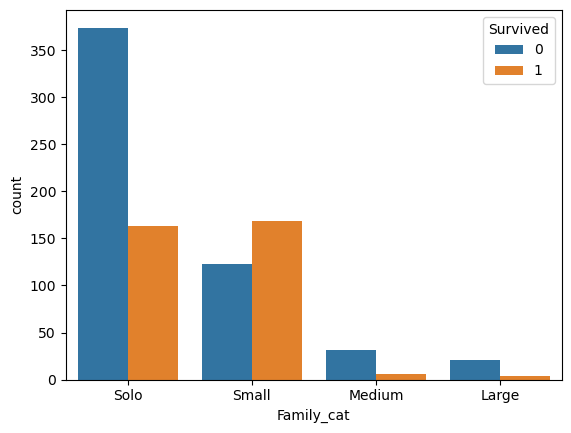

In [37]:
sns.countplot(data= train_df, x = "Family_cat", hue = "Survived")

### 4.2 Data Wrangling

In [38]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Family_cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo


In [39]:
num_features = ["Age", "Fare"]
cat_features = ["Sex", "Pclass", "Embarked", "Title", "Family_cat"]
features_col = num_features + cat_features
print(features_col)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [40]:
def missing(df, features_col):
    n_rows = df.shape[0]
    for col in features_col:
        miss_count = df[col].isnull().sum()
        if miss_count > 0 :
            print(f"{col} has {miss_count*100/n_rows:.2f} missing values")
missing(train_df, features_col)

Age has 19.87 missing values
Embarked has 0.22 missing values


In [41]:
missing(test_df, features_col)

Age has 20.57 missing values
Fare has 0.24 missing values


### Fill missing value

In [42]:
train_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size,Family_cat
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,Small
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,Small
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,Solo
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,Small
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other,1,Solo
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss,1,Solo
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4,Small


In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     891 non-null    category
 1   Pclass       891 non-null    category
 2   Name         891 non-null    object  
 3   Sex          891 non-null    category
 4   Age          714 non-null    float64 
 5   SibSp        891 non-null    category
 6   Parch        891 non-null    category
 7   Ticket       891 non-null    object  
 8   Fare         891 non-null    float64 
 9   Cabin        204 non-null    object  
 10  Embarked     889 non-null    category
 11  Title        891 non-null    object  
 12  Family_size  891 non-null    int32   
 13  Family_cat   891 non-null    category
dtypes: category(7), float64(2), int32(1), object(4)
memory usage: 59.7+ KB


In [44]:
train_df["Pclass"] = train_df["Pclass"].astype("category")

In [45]:
age_sex_pclass = train_df.groupby(["Sex", "Pclass"])["Age"].median()

In [46]:
age_sex_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [47]:
train_df['Age'] = train_df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))
test_df['Age'] = test_df.groupby(["Sex", "Pclass"])["Age"].transform(lambda x: x.fillna(x.mean()))

In [48]:
missing(train_df, features_col)

Embarked has 0.22 missing values


In [49]:
missing(test_df, features_col)

Fare has 0.24 missing values


In [50]:
X = train_df[features_col]
y = train_df['Survived']

In [51]:
X_test = test_df[features_col]

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
num_transformer = Pipeline(steps=[
    ("inputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ("inputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", OneHotEncoder(handle_unknown="ignore"))
])

In [53]:
preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

In [54]:
preprocessor.fit(X)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('inputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('inputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [55]:
X = preprocessor.transform(X)

In [56]:
X_test = preprocessor.transform(X_test)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [58]:
X_train.shape, X_val.shape , X_test.shape

((712, 19), (179, 19), (418, 19))

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, classification_report

In [60]:
log = LogisticRegression(solver="liblinear", max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
log.score(X_val, y_val)

0.8100558659217877

In [62]:
y_pred = log.predict(X_val)

In [63]:
precision_score(y_val, y_pred)

0.7611940298507462

In [64]:
recall_score(y_val, y_pred)

0.7391304347826086

In [65]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [66]:
poly = PolynomialFeatures(degree=2)
poly_X_train = poly.fit_transform(X_train)
poly_X_val = poly.fit_transform(X_val)

In [67]:
poly_log =LogisticRegression(solver="liblinear", max_iter=1000)
poly_log.fit(poly_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [68]:
poly_log.score(poly_X_val, y_val)

0.8156424581005587

In [69]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=8)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [70]:
tree.score(X_val, y_val)

0.776536312849162

### 5.1 Cross-validation

In [71]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [72]:
log_cv = LogisticRegression(solver="liblinear", max_iter=1000)
tree_cv = DecisionTreeClassifier(criterion="entropy", max_depth=8)

lr_scores = cross_val_score(log_cv, X, y, scoring="accuracy", cv = 5)

In [73]:
lr_scores.mean(), lr_scores.std()

(0.826031008725127, 0.020466357172416235)

In [74]:
tree_scores = cross_val_score(tree_cv, X, y, scoring="accuracy", cv = 5)

In [75]:
tree_scores.mean(), tree_scores.std()

(0.7991274872889335, 0.016080150104786223)

### 5.2 Baseline Model Comparison

In [76]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
models = [
    LinearSVC(max_iter=1000),
    SVC(),
    KNeighborsClassifier(metric='minkowski', p=2),
    LogisticRegression(solver="liblinear", max_iter=1000),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(use_label_encoder = False, eval_metric = "logloss")
]

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitl

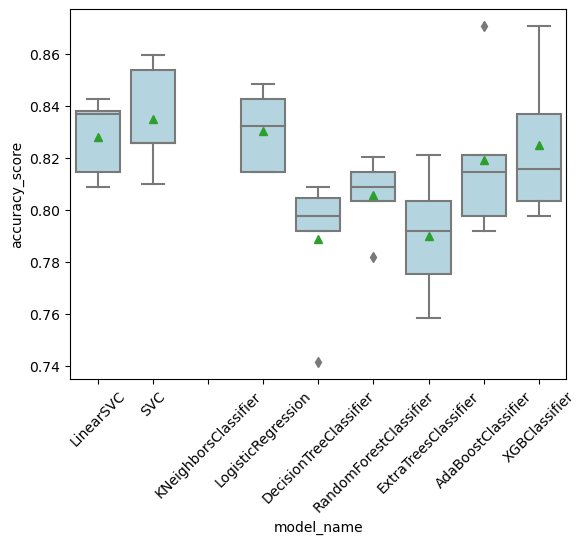

In [77]:
def generate_baseline_res(models, X, y, metrics, cv=5, plot_result = False):
    kfold = StratifiedKFold(cv, shuffle=True)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name, fold_idx, score))
    cv_df = pd.DataFrame(entries, columns=["model_name", 'fold_id', "accuracy_score"])
    if plot_result:
        sns.boxplot(x = 'model_name', y = "accuracy_score", data=cv_df, color="lightblue", showmeans=True)
        plt.xticks(rotation = 45)
        plt.show()
    mean = cv_df.groupby('model_name')["accuracy_score"].mean()
    std = cv_df.groupby('model_name')["accuracy_score"].std()
    base_res = pd.concat([mean, std], axis=1, ignore_index=True)
    base_res.columns = ["Mean", "Standard Deviation"]
    base_res.sort_values(by = 'Mean', ascending=False, inplace=True)
    return base_res
base_res = generate_baseline_res(models, X, y, metrics="accuracy", cv = 5, plot_result=True)


In [78]:
base_res

,Mean,Standard Deviation
model_name,,
SVC,0.835045,0.020923
LogisticRegression,0.830525,0.015612
LinearSVC,0.828272,0.015319
XGBClassifier,0.824926,0.029749
AdaBoostClassifier,0.819302,0.031140
RandomForestClassifier,0.805863,0.014682
ExtraTreesClassifier,0.790089,0.024352
DecisionTreeClassifier,0.788984,0.027270
KNeighborsClassifier,NaN,NaN
